# Normalización

Surge de la problemática en la que tenemos un dataset con múltiples columnas con escalas diferentes, por ejemplo:

|# autos   | Salario   |
|---|---|
|0   |1000   |
|2   |6000   |
|1   |3000   |
|1   |7000   |
|3   |10000   |

El # de autos y salarios tienen una diferencia numérica significativa, el modelo al no tener el contexto de que significa cada uno de estas columnas le va a dar mayor importancia a los números más altos, por lo que se le agrega cierto cesgo al modelo, la solución a esto es llevar todas las columnas a la misma escala. Generalmento los modelos son suceptibles a estas escalas.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Visualizando el problema

In [48]:
data = pd.read_csv("../data/raw/datos_personas.csv")
data.head()

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1


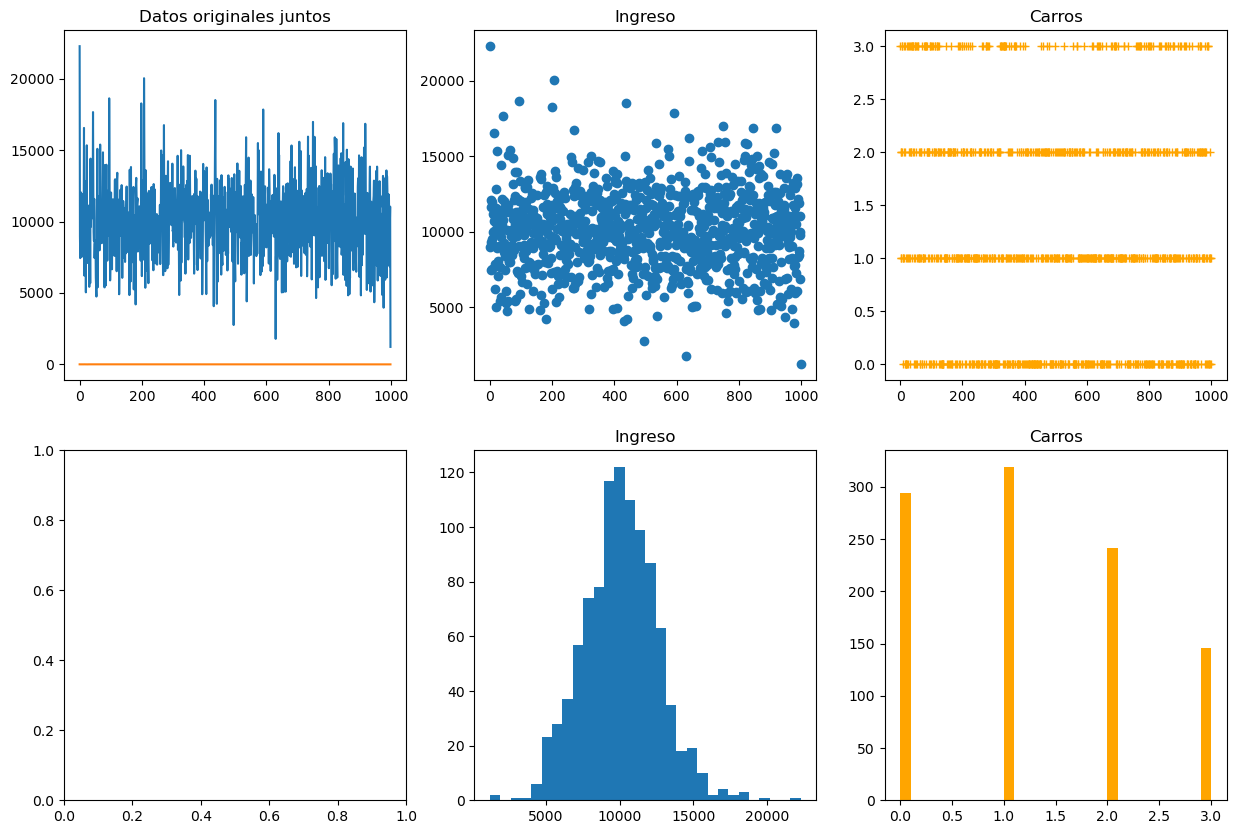

In [49]:
fig, axes = plt.subplots(2, 3, figsize = (15,10))

axes[0, 0].set_title("Datos originales juntos")
axes[0, 0].plot(data)

axes[0, 1].set_title("Ingreso")
axes[0, 1].plot(data["ingreso"], marker = "o", linewidth = 0)

axes[0, 2].set_title("Carros")
axes[0, 2].plot(data["carros"], color = "orange", marker = "+", linewidth = 0)

axes[1, 1].set_title("Ingreso")
axes[1, 1].hist(data["ingreso"], bins = 30)

axes[1, 2].set_title("Carros")
axes[1, 2].hist(data["carros"], color = "orange", bins = 30)
plt.show()

## Técnicas de escalado

### Escala en función del mínimo y máximo

Es una escala en referencia al mínimo y máximo de cada columna:

$$x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

Es altamente utilizado pero sensible a los outliers.

In [56]:
data_min_max = preprocessing.MinMaxScaler().fit_transform(data)
data_min_max = pd.DataFrame(data_min_max, columns = ["ingreso", "carros"])
data_min_max

,ingreso,carros
0,1.000000,1.000000
1,0.367616,0.333333
2,0.295265,0.666667
3,0.515058,0.666667
4,0.383546,0.333333
...,...,...
995,0.416899,0.000000
996,0.268147,0.666667
997,0.405451,0.333333
998,0.466563,0.333333


### Norma del Vector

NO tiene nada que ver con la distribución normal, esta normalización implica utilizar la norma de un vector para llevarlos a un valor de 0 a 1 dependiendo de la magnitud del vector: $$x_{normalized}=\frac{x}{\sqrt{x_1^2+x_2^2+\dots+x_n^2}}$$

In [57]:
data_normalizer = preprocessing.Normalizer().transform(data.T).T
data_normalizer = pd.DataFrame(data_normalizer, columns = ["ingreso", "carros"])
data_normalizer

,ingreso,carros
0,0.067779,0.058869
1,0.027269,0.019623
2,0.022634,0.039246
3,0.036714,0.039246
4,0.028289,0.019623
...,...,...
995,0.030426,0.000000
996,0.020897,0.039246
997,0.029692,0.019623
998,0.033607,0.019623


### Estandarización

Se cambia la distribución de los datos para llevarla a una normal con media 0 y desviación estandar 1.

$$x_{standarized}=\frac{x-\bar{x}}{\sigma}$$
Poco afectado por datos atípicos (Es de los más usados):
$$x_{standarized}=\frac{x-IQR}{\sigma}$$

La ventaja de esta técnica es que gran parte de los modelos asumen datos con distribución normal.

In [58]:
data_standar_scaler = preprocessing.StandardScaler().fit_transform(data)
data_standar_scaler = pd.DataFrame(data_standar_scaler, columns = ["ingreso", "carros"])
data_standar_scaler

,ingreso,carros
0,4.815552,1.708920
1,-0.441302,-0.231932
2,-1.042732,0.738494
3,0.784354,0.738494
4,-0.308879,-0.231932
...,...,...
995,-0.031624,-1.202358
996,-1.268161,0.738494
997,-0.126783,-0.231932
998,0.381227,-0.231932


In [59]:
data_robust_scaler = preprocessing.RobustScaler().fit_transform(data)
data_robust_scaler = pd.DataFrame(data_robust_scaler, columns = ["ingreso", "carros"])
data_robust_scaler

,ingreso,carros
0,3.705483,1.0
1,-0.337660,0.0
2,-0.800231,0.5
3,0.605014,0.5
4,-0.235811,0.0
...,...,...
995,-0.022569,-0.5
996,-0.973613,0.5
997,-0.095758,0.0
998,0.294962,0.0


## Visualización de las técnicas

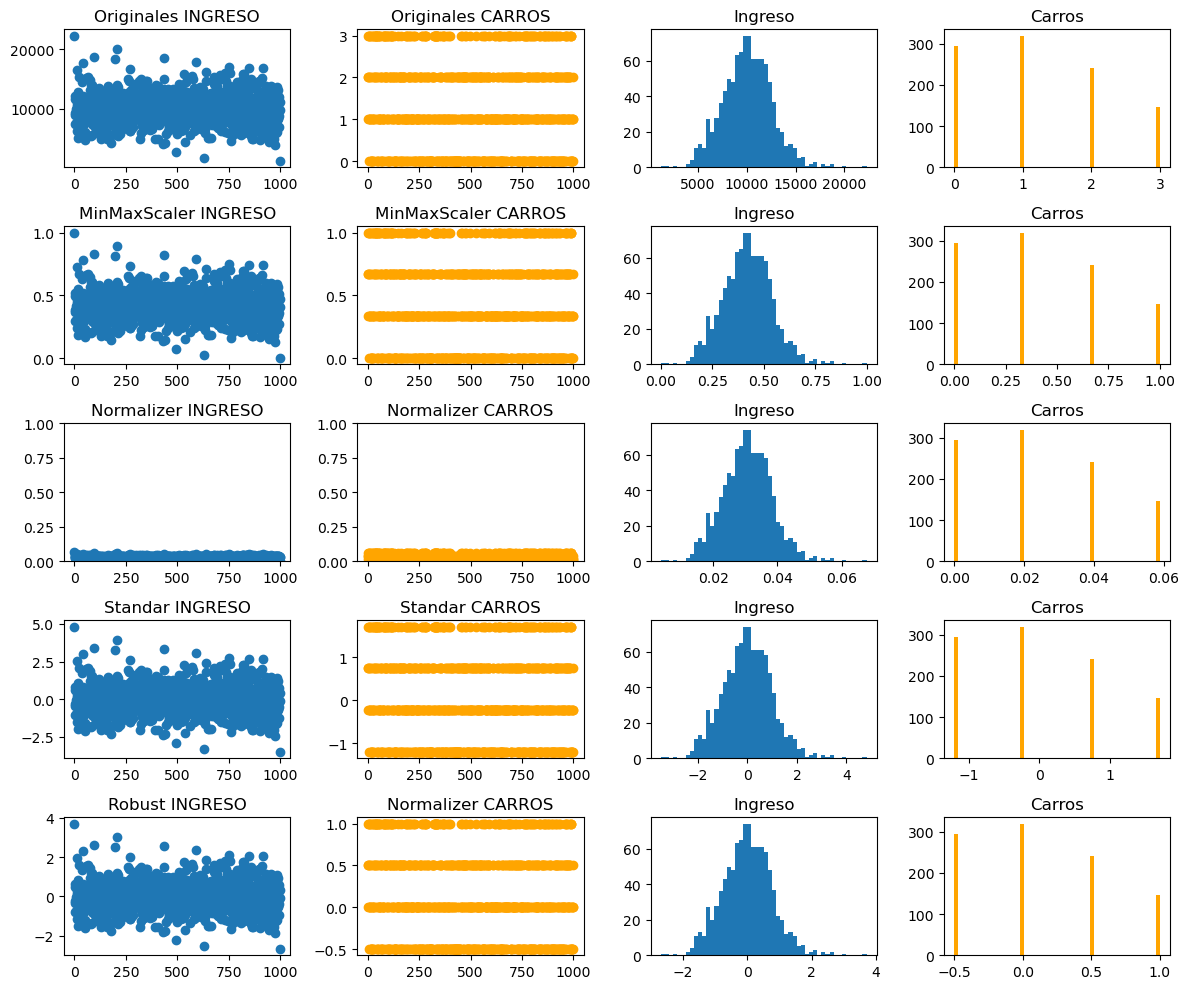

In [74]:
fig, axes = plt.subplots(5, 4, figsize = (50//4, 40//4))

# Datos originales
axes[0, 0].set_title("Originales INGRESO")
axes[0, 0].plot(data["ingreso"], marker = "o", linewidth = 0)

axes[0, 1].set_title("Originales CARROS")
axes[0, 1].plot(data["carros"], marker = "o", linewidth = 0, color = "orange")

axes[0, 2].set_title("Ingreso")
axes[0, 2].hist(data["ingreso"], bins = 50)

axes[0, 3].set_title("Carros")
axes[0, 3].hist(data["carros"], color = "orange", bins = 50)


# MinMaxScaler
axes[1, 0].set_title("MinMaxScaler INGRESO")
axes[1, 0].plot(data_min_max["ingreso"], marker = "o", linewidth = 0)

axes[1, 1].set_title("MinMaxScaler CARROS")
axes[1, 1].plot(data_min_max["carros"], marker = "o", linewidth = 0, color = "orange")

axes[1, 2].set_title("Ingreso")
axes[1, 2].hist(data_min_max["ingreso"], bins = 50)

axes[1, 3].set_title("Carros")
axes[1, 3].hist(data_min_max["carros"], color = "orange", bins = 50)


# Normalizer
axes[2, 0].set_title("Normalizer INGRESO")
axes[2, 0].plot(data_normalizer["ingreso"], marker = "o", linewidth = 0)
axes[2, 0].set_ylim(0, 1)

axes[2, 1].set_title("Normalizer CARROS")
axes[2, 1].plot(data_normalizer["carros"], marker = "o", linewidth = 0, color = "orange")
axes[2, 1].set_ylim(0, 1)

axes[2, 2].set_title("Ingreso")
axes[2, 2].hist(data_normalizer["ingreso"], bins = 50)

axes[2, 3].set_title("Carros")
axes[2, 3].hist(data_normalizer["carros"], color = "orange", bins = 50)

# Standar
axes[3, 0].set_title("Standar INGRESO")
axes[3, 0].plot(data_standar_scaler["ingreso"], marker = "o", linewidth = 0)

axes[3, 1].set_title("Standar CARROS")
axes[3, 1].plot(data_standar_scaler["carros"], marker = "o", linewidth = 0, color = "orange")

axes[3, 2].set_title("Ingreso")
axes[3, 2].hist(data_standar_scaler["ingreso"], bins = 50)

axes[3, 3].set_title("Carros")
axes[3, 3].hist(data_standar_scaler["carros"], color = "orange", bins = 50)

# Robust
axes[4, 0].set_title("Robust INGRESO")
axes[4, 0].plot(data_robust_scaler["ingreso"], marker = "o", linewidth = 0)

axes[4, 1].set_title("Normalizer CARROS")
axes[4, 1].plot(data_robust_scaler["carros"], marker = "o", linewidth = 0, color = "orange")

axes[4, 2].set_title("Ingreso")
axes[4, 2].hist(data_robust_scaler["ingreso"], bins = 50)

axes[4, 3].set_title("Carros")
axes[4, 3].hist(data_robust_scaler["carros"], color = "orange", bins = 50)

plt.tight_layout()